<a href="https://colab.research.google.com/github/MayooranT/Fundamentals-of-Image-Processing/blob/main/Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 02    #### 180391V      #### T.Mayooran

## Question 1

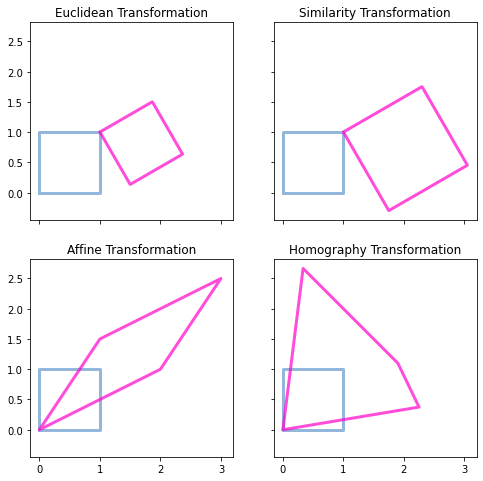

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import string 

#""""Implementation of Euclidean Transformation""""
#rotation of pi/3 angle and translation of 1,1
a, b, c, d = (0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1)
P = np.array([a, b, c, d]).T
t = np.pi/3
H = [[np.cos(t), np.sin(t), 1.], [-np.sin(t), np.cos(t),1.], [0., 0., 1.]]
Pt = np.matmul(H, P)
P = P/P[-1, :]
P = np.insert(P,4,P[:,0],axis=1)
x = P[0, :]
y = P[1, :]
Pt = Pt/Pt[-1, :]
Pt = np.insert(Pt,4,Pt[:,0],axis=1)
xt = Pt[0, :]
yt = Pt[1, :]
fig, ax = plt.subplots(2,2, sharex=True, sharey=True,figsize=(8,8))
ax[0,0].plot(x, y, color='#6699cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax[0,0].set_aspect('equal')
ax[0,0].set_title('Euclidean Transformation')
ax[0,0].plot(xt, yt, color='#ff00cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax[0,0].set_aspect('equal')

#""""Implementation of Similarity Transformation"""
#rotation of pi/3 angle, translation of 1,1 and scale of 1.5
t = np.pi/3
s=1.5
H = [[s*np.cos(t), s*np.sin(t), 1.], [s*-np.sin(t), s*np.cos(t),1.], [0., 0., 1.]]
Pt = np.matmul(H, P)
P = P/P[-1, :]
P = np.insert(P,4,P[:,0],axis=1)
x = P[0, :]
y = P[1, :]
Pt = Pt/Pt[-1, :]
Pt = np.insert(Pt,4,Pt[:,0],axis=1)
xt = Pt[0, :]
yt = Pt[1, :]
ax[0,1].plot(x, y, color='#6699cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax[0,1].set_aspect('equal')
ax[0,1].set_title('Similarity Transformation')
ax[0,1].plot(xt, yt, color='#ff00cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax[0,1].set_aspect('equal')

#""""Implementation of Affine Transformation""""
H = np.identity(3)
H[0,0] = 1
H[1,1] = 1
H[1,0] = 1.5
H[0,1] = 2
Pt = np.matmul(H, P)
P = P/P[-1, :]
P = np.insert(P,4,P[:,0],axis=1)
x = P[0, :]
y = P[1, :]
Pt = Pt/Pt[-1, :]
Pt = np.insert(Pt,4,Pt[:,0],axis=1)
xt = Pt[0, :]
yt = Pt[1, :]
ax[1,0].plot(x, y, color='#6699cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax[1,0].set_aspect('equal')
ax[1,0].set_title('Affine Transformation')
ax[1,0].plot(xt, yt, color='#ff00cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax[1,0].set_aspect('equal')

#""""Implementation of Homography Transformation""""
H = np.identity(3)
H[0,0] = 1
H[1,1] = 3
H[0,1] = 18
H[1,0] = 8
H[2,0] = 2
H[2,1] = 7
Pt = np.matmul(H, P)
P = P/P[-1, :]
P = np.insert(P,4,P[:,0],axis=1)
x = P[0, :]
y = P[1, :]
Pt = Pt/Pt[-1, :]
Pt = np.insert(Pt,4,Pt[:,0],axis=1)
xt = Pt[0, :]
yt = Pt[1, :]
ax[1,1].plot(x, y, color='#6699cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax[1,1].set_aspect('equal')
ax[1,1].set_title('Homography Transformation')
ax[1,1].plot(xt, yt, color='#ff00cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax[1,1].set_aspect('equal')

## Question 2

In this piece of code, the transformation matrix is given as 'H1to5p'.
So the warped image 5 perfectly align with the image 1. Note that, the cv.warpPerspective() function is not used but a function for the same purpose is implemented using loops according to the lecturer's request.

(-0.5, 999.5, 999.5, -0.5)

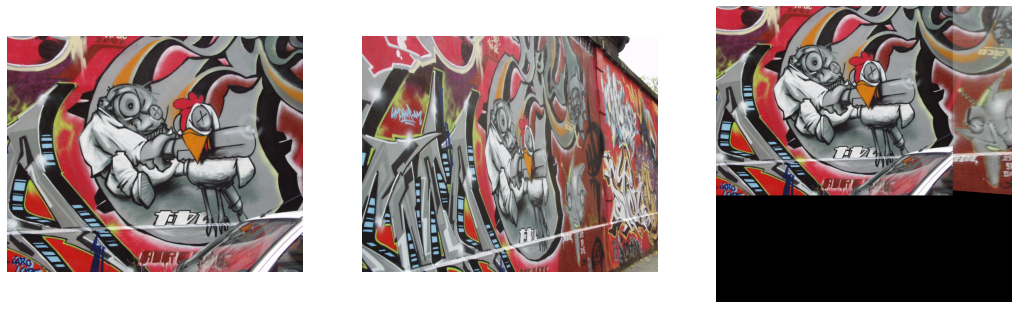

In [ ]:
import cv2 as cv
import numpy as np

def img_to_array(img):
    r, c, ch = img.shape
    im_array = np.zeros((c,r, ch), dtype= img.dtype)
    for i in range(r):
        im_array[:,i] = img[i]
    return im_array

def array_to_img(arr):
    r,c,ch = arr.shape
    image = np.zeros((c,r,ch) , dtype=arr.dtype)
    for i in range(c):
        image[i] = arr[:,i]
    return image

def warpPerspective(img, H, size):
    r, c = size
    R, C = img.shape[0], img.shape[1]
    new_img = np.zeros((r,c, img.shape[2]), dtype=img.dtype)
    img_array = img_to_array(img)

    for i in range(r):
        for j in range(c):
            p = np.matmul( np.linalg.inv(H), np.array([i, j ,1]))
            p = p/p[2]
            i1 = int(p[0])
            j1 = int(p[1])
            if (i1 >= 0 and i1 < C) and  (j1 >= 0 and j1 < R):
                new_img[i,j] = img_array[i1, j1]
    new_img = array_to_img(new_img)
    return new_img


im1o = cv.imread('graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5o = cv.imread('graf/img5.ppm', cv.IMREAD_ANYCOLOR)
im1=cv.cvtColor(im1o, cv.COLOR_BGR2RGB)
im5=cv.cvtColor(im5o, cv.COLOR_BGR2RGB)

with open('graf/H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]
H = np.array(H)
im5_warped = warpPerspective(im5, np.linalg.inv(H), (1000,1000))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

fig, ax = plt.subplots(1,3,figsize=(18,18))
ax[0].imshow(im1)
ax[0].axis('off')
ax[1].imshow(im5)
ax[1].axis('off')
ax[2].imshow(im5_warped)
ax[2].axis('off')

## Question3

In this code, simliar points on each images are given as mouse clicks by us. So that the cv.findHomography function can find the transformation matrix. 

In [ ]:
import cv2 as cv
import numpy as np
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1

im1 = cv.imread('graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('graf/img5.ppm', cv.IMREAD_ANYCOLOR)
im1copy = im1.copy()
im5copy = im5.copy()

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

param = [p2, im5copy]
n = 0
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 5',draw_circle, param)

while(1):
    cv.imshow("Image 5", im5copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

print(p1)
print(p2)
cv.destroyAllWindows()
H1,mask=cv.findHomography(p1,p2)
print(H1)

[[334. 193.]
 [405. 207.]
 [527. 223.]
 [518. 347.]
 [641. 297.]]
[[383. 236.]
 [408. 259.]
 [451. 281.]
 [457. 396.]
 [492. 352.]]
[[ 6.37943397e-01 -3.43288001e-01  2.47071892e+02]
 [ 2.68670273e-01  6.70296594e-01  2.53948449e+01]
 [ 6.28030480e-04 -9.29102351e-04  1.00000000e+00]]


After finding the transformation matrix, the cv.warpPerspective function is used to warp image 5 and align it with the image 1.
As the similar points are given by us, the accuracy of the alignment is not excellent. It seems if we increase the matching points we feed to the code, the accuracy may increase. 

(-0.5, 999.5, 999.5, -0.5)

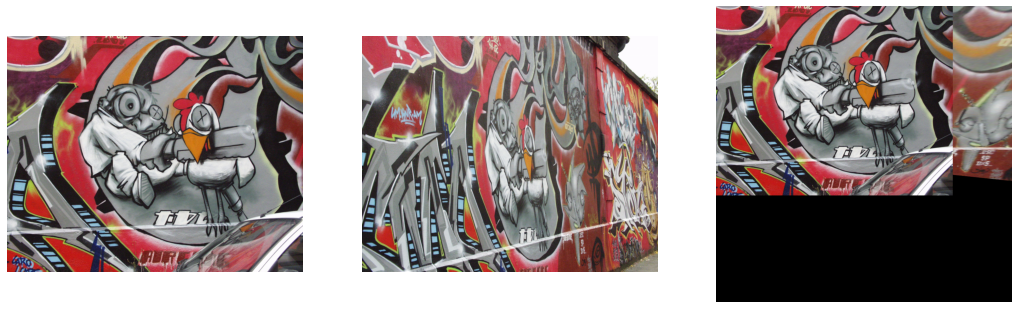

In [ ]:
im1=cv.cvtColor(im1o, cv.COLOR_BGR2RGB)
im5=cv.cvtColor(im5o, cv.COLOR_BGR2RGB)
im5_warped = cv.warpPerspective(im5, np.linalg.inv(H1), (1000,1000))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

fig, ax = plt.subplots(1,3,figsize=(18,18))
ax[0].imshow(im1)
ax[0].axis('off')
ax[1].imshow(im5)
ax[1].axis('off')
ax[2].imshow(im5_warped)
ax[2].axis('off')

## Question4

In this piece of code, we implement the transformation matrix from the mouse click points without using the cv.findHomography function. 

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1
        
im1 = cv.imread('graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('graf/img5.ppm', cv.IMREAD_ANYCOLOR)
im1copy = im1.copy()
im5copy = im5.copy()
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

param = [p2, im5copy]
n = 0
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 5',draw_circle, param)

while(1):
    cv.imshow("Image 5", im5copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

print(p1)
print(p2)
A = []
for i in range(0, len(p1)):
    x, y = p1[i][0], p1[i][1]
    u, v = p2[i][0], p2[i][1]
    A.append([x, y, 1, 0, 0, 0, -u*x, -u*y, -u])
    A.append([0, 0, 0, x, y, 1, -v*x, -v*y, -v])
A = np.asarray(A)
U, S, Vh = np.linalg.svd(A)
L = Vh[-1,:] / Vh[-1,-1]
H2= L.reshape(3, 3)
print(H2)

[[336. 193.]
 [404. 208.]
 [528. 223.]
 [517. 347.]
 [140. 130.]]
[[384. 236.]
 [409. 257.]
 [454. 279.]
 [456. 388.]
 [297. 152.]]
[[ 6.40127947e-01  2.58429503e-02  2.22055438e+02]
 [ 2.25407269e-01  1.06942600e+00 -9.42268531e+00]
 [ 4.97495746e-04 -7.14119426e-05  1.00000000e+00]]


Since the matching points are given by us and the number of points might be insufficient. This caused the poor alignment of the image 5 on image 1.

(-0.5, 999.5, 999.5, -0.5)

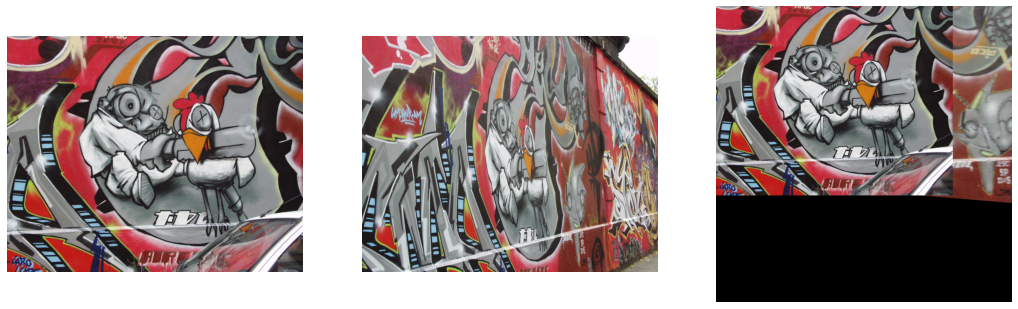

In [ ]:
im1=cv.cvtColor(im1, cv.COLOR_BGR2RGB)
im5=cv.cvtColor(im5, cv.COLOR_BGR2RGB)
im5_warped = cv.warpPerspective(im5, np.linalg.inv(H2), (1000,1000))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

fig, ax = plt.subplots(1,3,figsize=(18,18))
ax[0].imshow(im1)
ax[0].axis('off')
ax[1].imshow(im5)
ax[1].axis('off')
ax[2].imshow(im5_warped)
ax[2].axis('off')

## Question 5

Super Glue code is used to obtain the similar points in the both images rather than mouse clicks.
As the code is huge,few important parts are only included.